In [1]:
from RTINS import *

In [2]:
from Init_det_glrt import Init_det_glrt
from func_loaddataset import func_loaddataset
from utils import *

In [3]:
u = func_loaddataset('./data_inert.txt')

In [4]:
simdata = Init_det_glrt()
# Variables for calculating the performance
D = len(simdata['data_sets'])
Jadapt = 0
Jadapt_all = np.zeros((D, 3))
gamma_vec = np.logspace(4, 6, 20)
M = len(gamma_vec)
ctr = 1
Niter = M
Jfixed = np.zeros(M)
Jfixed_all = np.zeros((M, D, 3))

ins = INS(simdata)

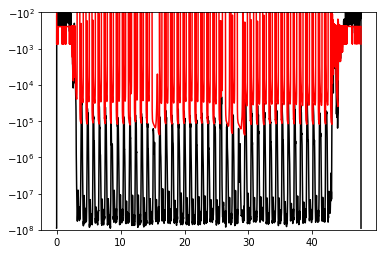

In [5]:
zupt , logL = ins.detector_adaptive(u)
x_h, _, _, _ = ins.baseline(u, zupt, logL, True)

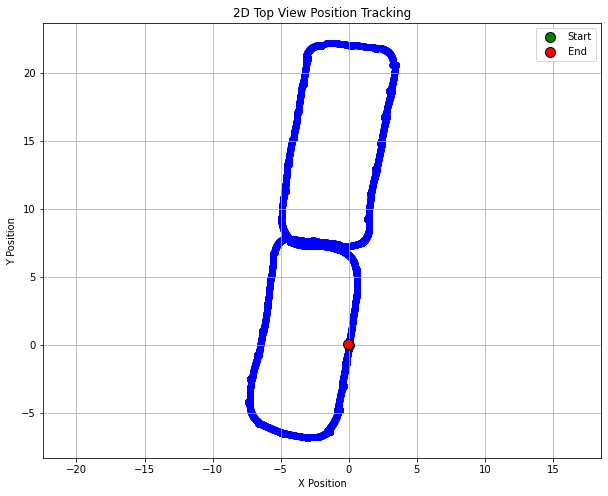

In [6]:
plot_position_tracking(x_h)

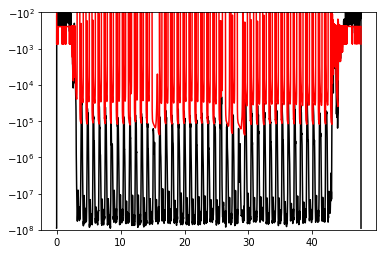

In [7]:
zupt , logL = ins.detector_adaptive(u)
x_h, _, _, _ = ins.baseline2(u, zupt, logL, True)

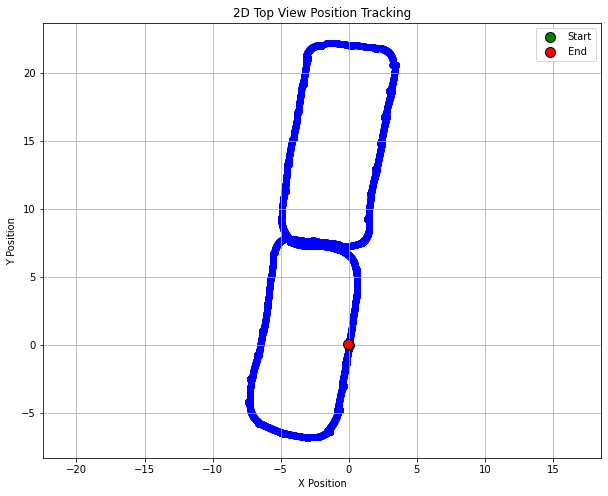

In [8]:
plot_position_tracking(x_h)

In [9]:
x_h[:, 0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -2.98368139, -0.0215776 ,  0.        ])

In [10]:
x_h[:, 10]

array([ 2.87667046e-06,  5.11120663e-06,  2.22405275e-05,  4.15611955e-05,
        3.72346652e-05,  1.33523251e-03, -2.98372140e+00, -2.13176334e-02,
        2.27431960e-04])

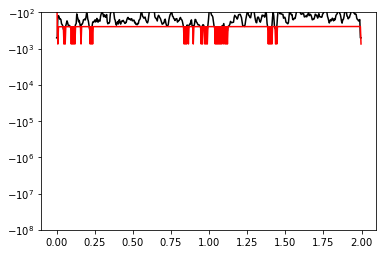

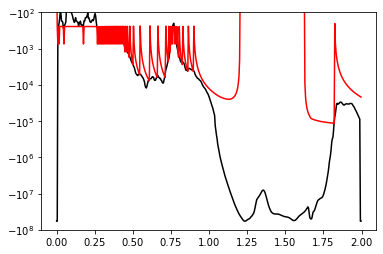

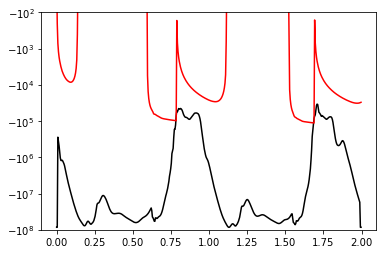

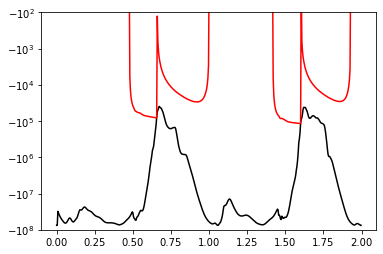

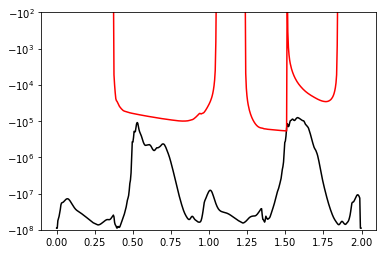

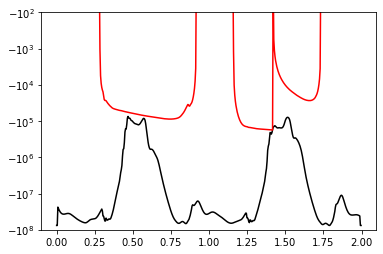

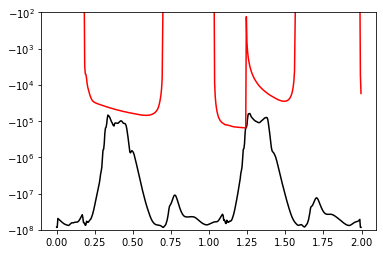

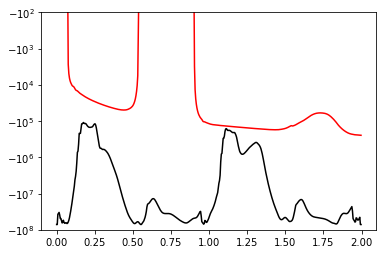

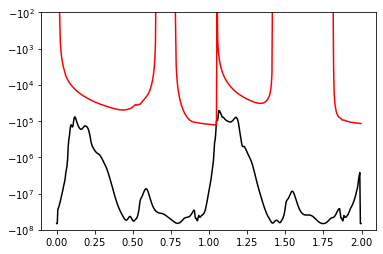

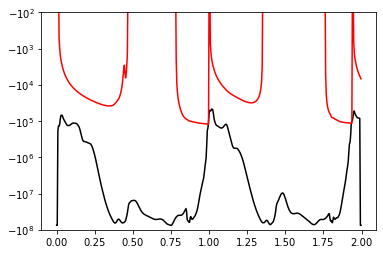

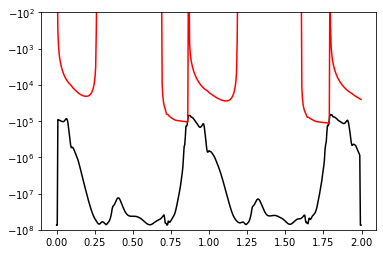

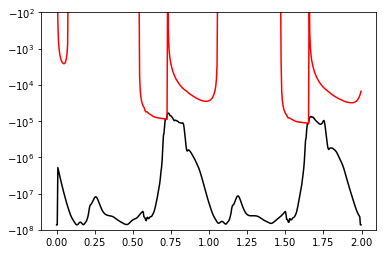

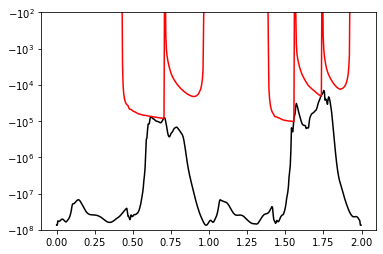

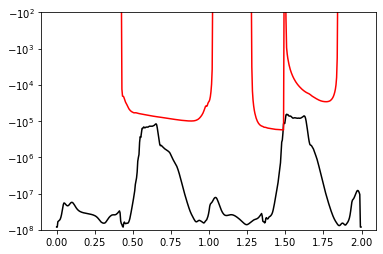

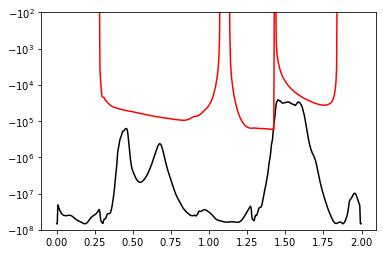

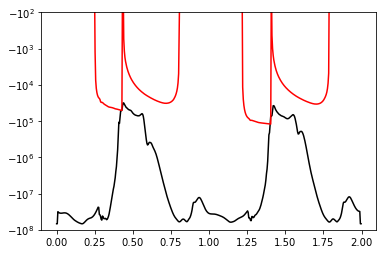

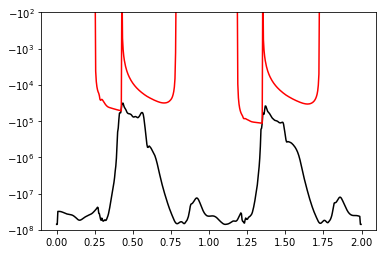

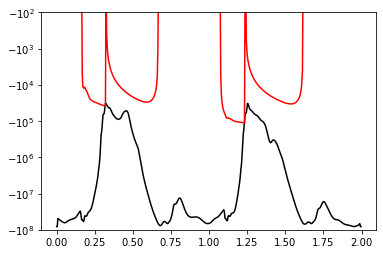

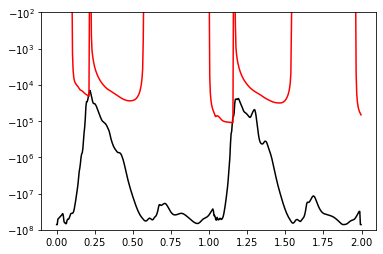

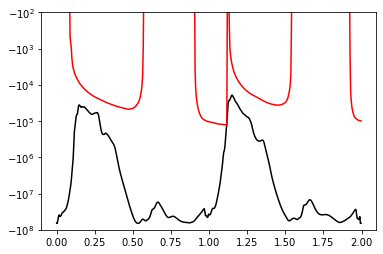

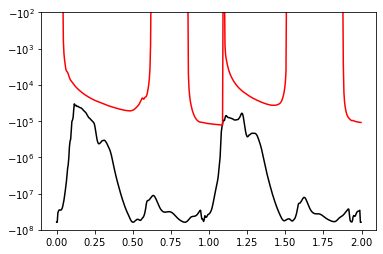

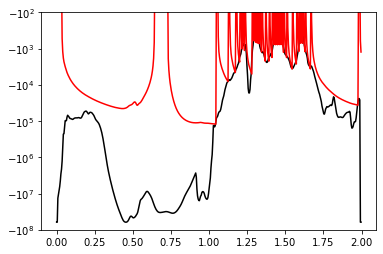

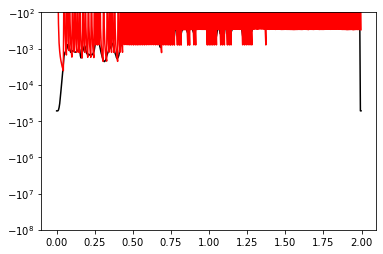

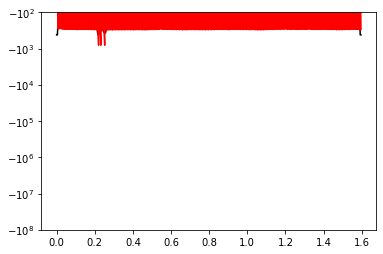

In [11]:
position = []
n = 500
num_batches = len(u[0]) // n
init_x = None
init_quat = None
init_P = None
for i in range(num_batches+1):
    # print(i)
    ui = u[:, i*n:(i+1)*n]
    zupt , logL = ins.detector_adaptive(ui)
    x_h, _, quat, P = ins.baseline(ui, zupt, logL, True, init_x, init_quat, init_P) # 9, N
    init_x, init_quat, init_P = x_h[:,-1], quat, P
    for j in range(len(x_h[0])):
        x,y,z = x_h[:3,j]
        position.append([x, y, z])
    

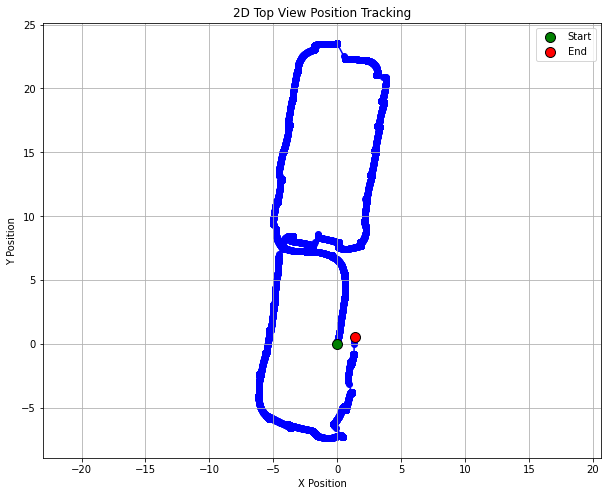

In [12]:
p = np.array(position)
xs = p[:,0]
ys = p[:,1]
# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(xs, ys, marker='o', linestyle='-', color='b', zorder=1)
plt.title('2D Top View Position Tracking')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')  # This ensures that unit increments are equal on both axes

# Highlight the first position with higher zorder
plt.scatter(xs[0], ys[0], color='green', s=100, edgecolor='black', label='Start', zorder=2)
# Highlight the last position with higher zorder
plt.scatter(xs[-1], ys[-1], color='red', s=100, edgecolor='black', label='End', zorder=2)

# Add a legend to identify the start and end
plt.legend()

# Display the plot
plt.show()

In [13]:
position = []

In [14]:
u1 = u[:, :6000]
u2 = u[:, 6000:12000]
u3 = u[:, 8000:12000]


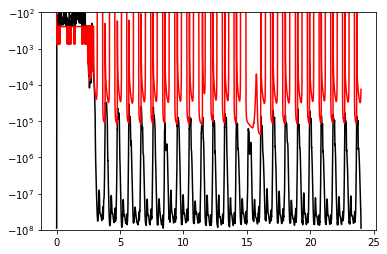

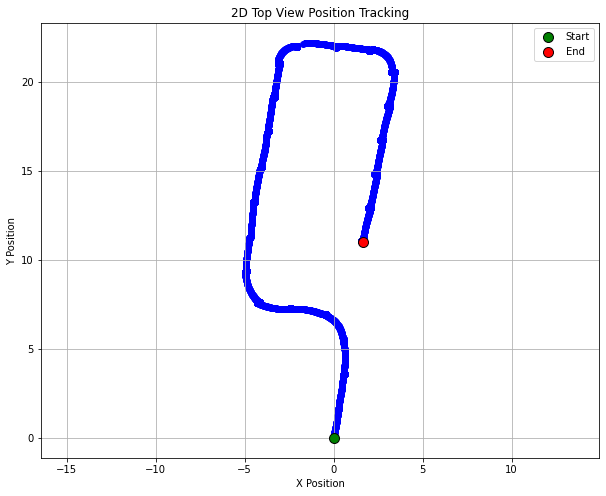

In [15]:
zupt , logL = ins.detector_adaptive(u1)
x_h, _, quat, P = ins.baseline2(u1, zupt, logL, True)
plot_position_tracking(x_h)

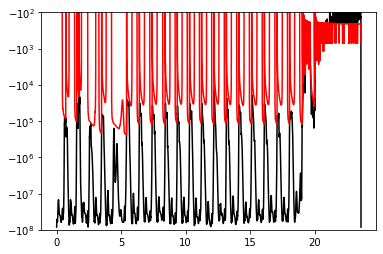

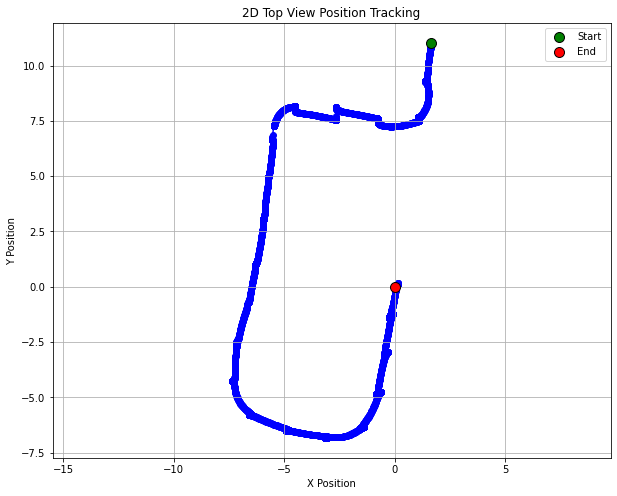

In [16]:
zupt , logL = ins.detector_adaptive(u2)
x_h, _, _, _ = ins.baseline2(u2, zupt, logL, True, x_h[:,-1], quat, P)
plot_position_tracking(x_h)

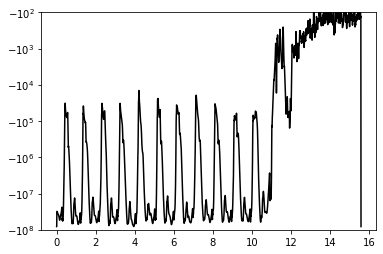

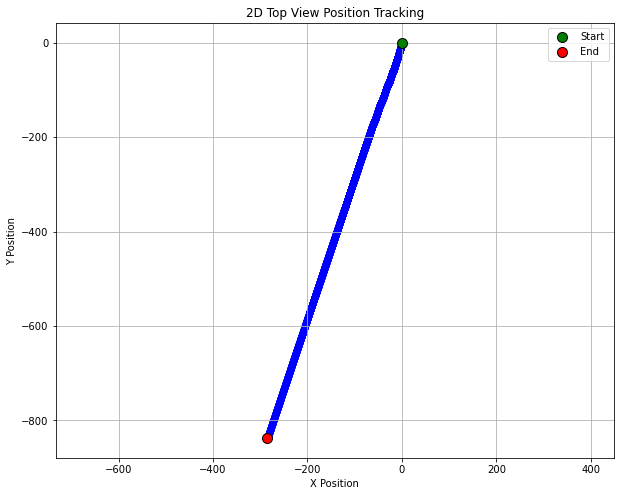

In [17]:
zupt , logL = ins.detector_adaptive(u3)
x_h, _, _, _ = ins.baseline2(u3, zupt, logL, True)
plot_position_tracking(x_h)

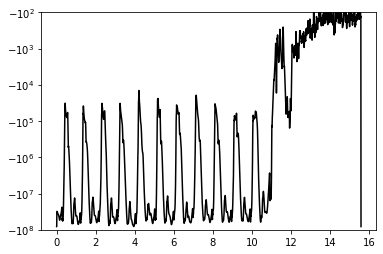

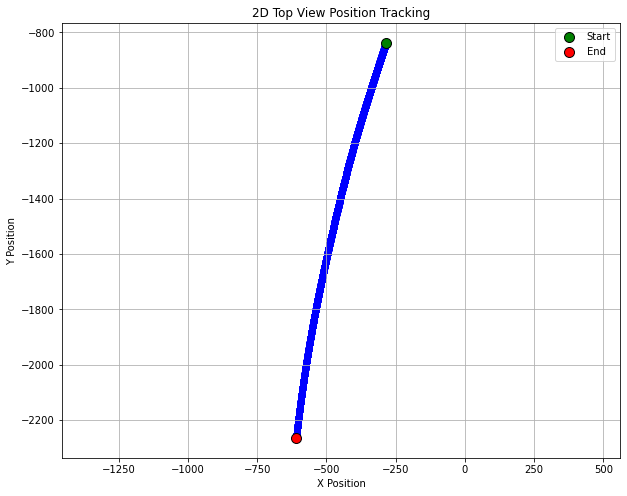

In [18]:
zupt , logL = ins.detector_adaptive(u3)
x_h, _, _, _ = ins.baseline2(u3, zupt, logL, True, x_h[:,-1], quat, P)
plot_position_tracking(x_h)

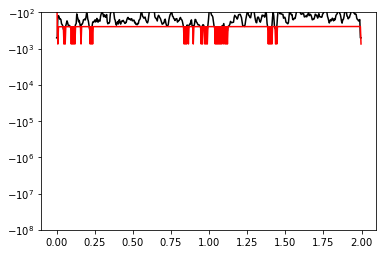

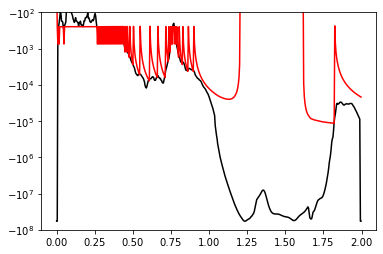

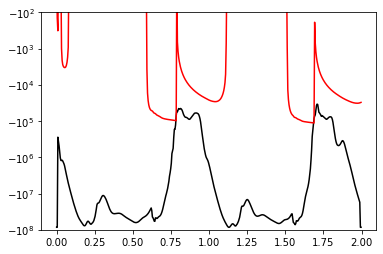

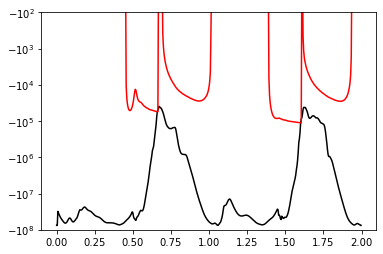

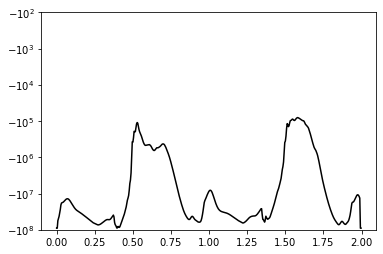

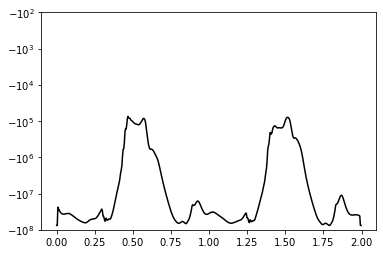

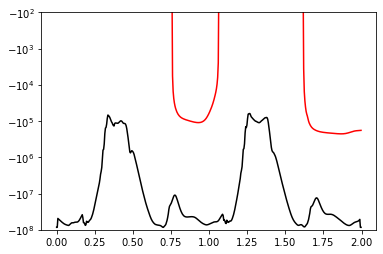

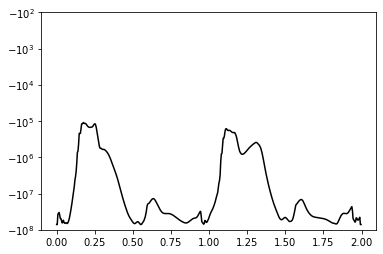

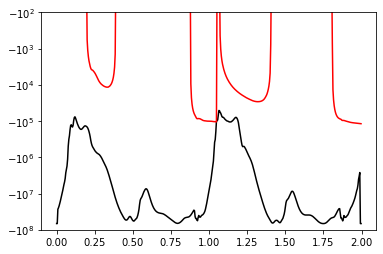

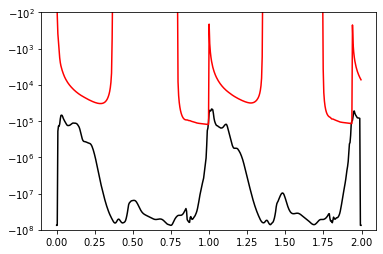

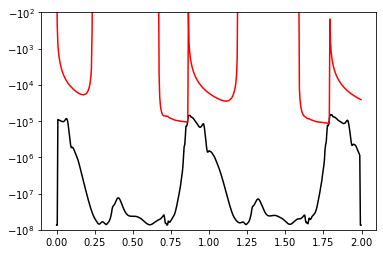

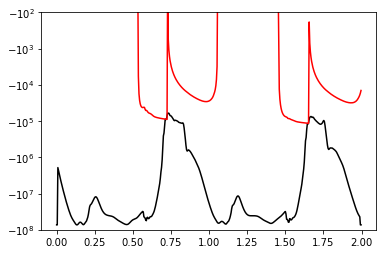

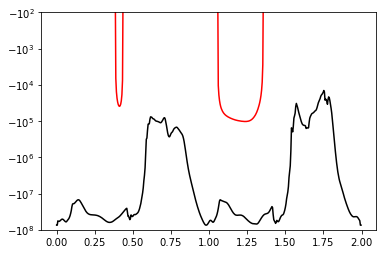

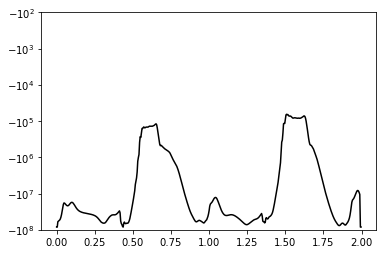

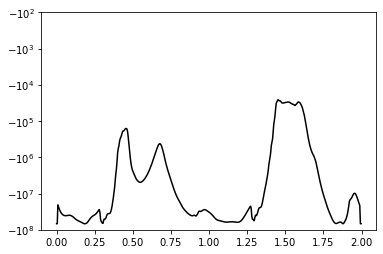

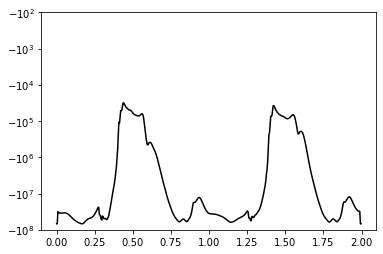

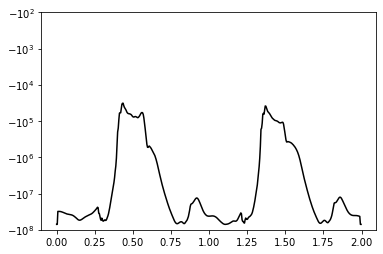

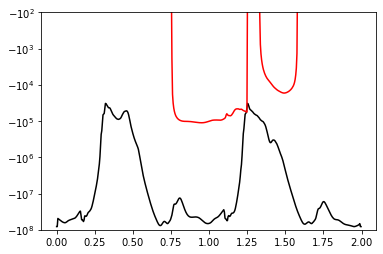

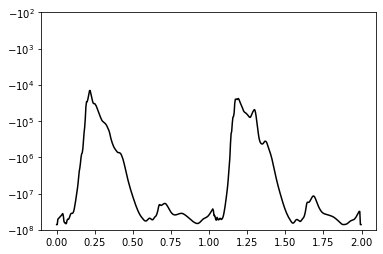

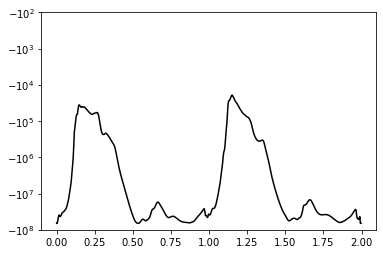

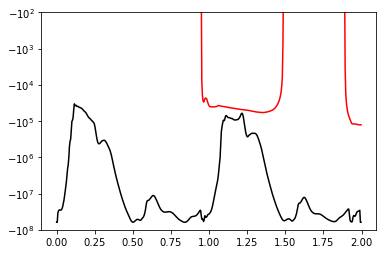

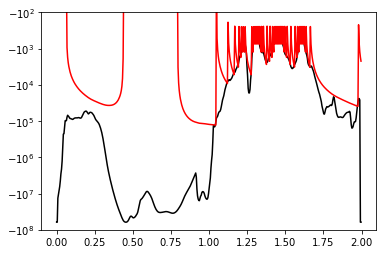

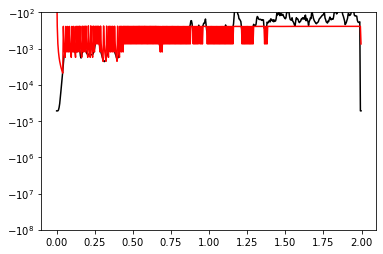

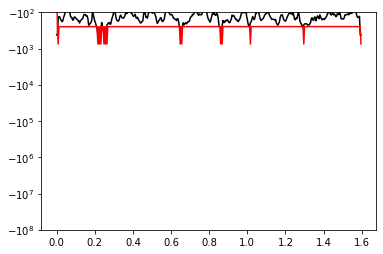

In [19]:
positions = None
n = 500
num_batches = len(u[0]) // n
positions = None
current_pos = None
for i in range(num_batches+1):
    # print(i)
    ui = u[:, i*n:(i+1)*n]
    zupt , logL = ins.detector_adaptive(ui)
    x_h, _, quat, P = ins.baseline(ui, zupt, logL, True) # 9, N
    if current_pos is not None:
        x_h += current_pos.reshape(-1,1)
    else:
        current_pos = x_h[:, -1]
    if positions is None:
        positions = x_h
    positions = np.hstack((positions,x_h))
    

In [20]:
positions.shape

(9, 12400)

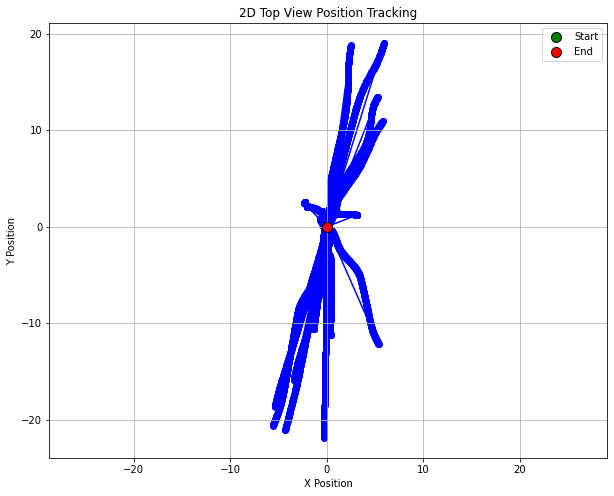

In [21]:
plot_position_tracking(positions)